# Домашнее задание №2

### *Практическое задание:*

**1) Попробуйте обучить, нейронную сеть на Keras (рассмотренную на уроке) на датасете MNIST с другими параметрами. Напишите в комментарии к уроку:**
- Какого результата вы добились от нейросети?
- Что помогло вам улучшить её точность?

In [1]:
#!pip install mnist

In [2]:
#!pip install --upgrade pip

In [3]:
#!pip install tensorflow

In [4]:
import mnist

# The first time you run this might be a bit slow, since the
# mnist package has to download and cache the data.
train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

print(train_images.shape) # (60000, 28, 28)
print(train_labels.shape) # (60000,)

(60000, 28, 28)
(60000,)


Визуализируем данные

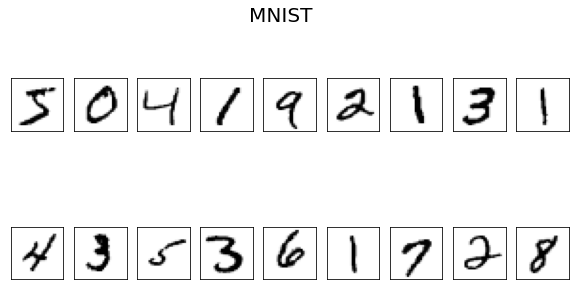

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 9, figsize=(10, 5))
fig.suptitle('MNIST', fontsize=20)
n = 0
for ax in axes.flat:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(train_images[n], cmap='Greys')
    n += 1

In [6]:
# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
from tensorflow.keras.utils import to_categorical

Зададим различные параметры модели:

In [9]:
# количество нейронов
n_number = [64,128,256]
# способ активации
activ = ['relu','selu','elu','tanh','sigmoid']
# количество эпох:
epochs_number = [5,10,20]

# Создание модели

In [10]:
import pandas as pd

In [11]:
neiro = []
activation = []
epo = []
loss = []
acc = []

In [12]:
# define the keras model
for n in n_number:
    for a in range(len(activ)):
        model = Sequential()
        model.add(Dense(n, input_dim=784, activation=str(activ[a])))
        model.add(Dense(n, activation=str(activ[a])))
        model.add(Dense(10, activation='softmax'))
        # создание keras модели
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        to_categorical(train_labels[:5])
        for e in epochs_number:
            model.fit(train_images, 
              to_categorical(train_labels), 
              epochs=e, 
              batch_size=32)
            # Оценка обученности нейронной сети
            eval = model.evaluate(
                test_images,
                to_categorical(test_labels))
            print(f'Нейроны - {n}, активация - {activ[a]}, эпохи - {e}, loss: {round(eval[0],2)}, accuracy: {round(eval[1],2)}')
            neiro.append(n)
            activation.append(activ[a])
            epo.append(e)
            loss.append(round(eval[0],4))
            acc.append(round(eval[1],4))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3755 - accuracy: 0.8888
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1983 - accuracy: 0.9404
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1493 - accuracy: 0.9550
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1261 - accuracy: 0.9610
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.1031 - accuracy: 0.9681
Нейроны - 64, активация - relu, эпохи - 5, loss: 0.1, accuracy: 0.97
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0989 - accuracy: 0.9691
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0896 - accuracy: 0.9717
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0820 - accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0750 - accuracy: 0.9758
Epoch 5/10
1875/1875

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3216 - accuracy: 0.9031
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1587 - accuracy: 0.9513
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1197 - accuracy: 0.9621
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0985 - accuracy: 0.9686
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0976 - accuracy: 0.9689
Нейроны - 64, активация - elu, эпохи - 5, loss: 0.1, accuracy: 0.97
Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0752 - accuracy: 0.9763
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0658 - accuracy: 0.9786
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0608 - accuracy: 0.9804
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0538 - accuracy: 0.9822
Epoch 5/10
1875/1875 [=========

1875/1875 [==============================] - 4s 2ms/step - loss: 0.5666 - accuracy: 0.8548
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2338 - accuracy: 0.9303
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1765 - accuracy: 0.9476
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1408 - accuracy: 0.9579
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1245 - accuracy: 0.9619
Нейроны - 64, активация - sigmoid, эпохи - 5, loss: 0.12, accuracy: 0.96
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1043 - accuracy: 0.9690
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0931 - accuracy: 0.9719
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0831 - accuracy: 0.9744
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0753 - accuracy: 0.9768
Epoch 5/10
1875/1875 [====

1875/1875 [==============================] - 5s 2ms/step - loss: 0.3216 - accuracy: 0.9018
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1581 - accuracy: 0.9516
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1192 - accuracy: 0.9625
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0977 - accuracy: 0.9695
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1183 - accuracy: 0.9644
Нейроны - 128, активация - selu, эпохи - 5, loss: 0.12, accuracy: 0.96
Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0736 - accuracy: 0.9768
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0669 - accuracy: 0.9783
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0605 - accuracy: 0.9804
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0564 - accuracy: 0.9817
Epoch 5/10
1875/1875 [======

1875/1875 [==============================] - 5s 2ms/step - loss: 0.2964 - accuracy: 0.9116
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1489 - accuracy: 0.9546
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1128 - accuracy: 0.9653
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0956 - accuracy: 0.9700
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0956 - accuracy: 0.9697
Нейроны - 128, активация - tanh, эпохи - 5, loss: 0.1, accuracy: 0.97
Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0762 - accuracy: 0.9765
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0665 - accuracy: 0.9784
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0636 - accuracy: 0.9795
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0571 - accuracy: 0.9811
Epoch 5/10
1875/1875 [=======

1875/1875 [==============================] - 6s 3ms/step - loss: 0.2766 - accuracy: 0.9144
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1364 - accuracy: 0.9585
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1024 - accuracy: 0.9679
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0843 - accuracy: 0.9736
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0808 - accuracy: 0.9757
Нейроны - 256, активация - relu, эпохи - 5, loss: 0.08, accuracy: 0.98
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0642 - accuracy: 0.9794
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0564 - accuracy: 0.9814
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0494 - accuracy: 0.9837
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0449 - accuracy: 0.9853
Epoch 5/10
1875/1875 [======

1875/1875 [==============================] - 6s 3ms/step - loss: 0.2811 - accuracy: 0.9132
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1378 - accuracy: 0.9579
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1044 - accuracy: 0.9676
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0882 - accuracy: 0.9718
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1036 - accuracy: 0.9652
Нейроны - 256, активация - elu, эпохи - 5, loss: 0.1, accuracy: 0.97
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0656 - accuracy: 0.9794
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0594 - accuracy: 0.9816
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0517 - accuracy: 0.9834
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0505 - accuracy: 0.9840
Epoch 5/10
1875/1875 [========

1875/1875 [==============================] - 6s 3ms/step - loss: 0.3996 - accuracy: 0.8838
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1764 - accuracy: 0.9461
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1228 - accuracy: 0.9626
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0916 - accuracy: 0.9722
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0767 - accuracy: 0.9768
Нейроны - 256, активация - sigmoid, эпохи - 5, loss: 0.08, accuracy: 0.98
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0630 - accuracy: 0.9798
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0544 - accuracy: 0.9827
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0468 - accuracy: 0.9848
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0411 - accuracy: 0.9865
Epoch 5/10
1875/1875 [===

# Результаты моделирования

In [13]:
summary_table = pd.DataFrame({'Количество нейронов': neiro, 'Способ активации': activation, 'Количество эпох': epo, 'Величина ошибки': loss, 'Точность модели': acc})
summary_table

,Количество нейронов,Способ активации,Количество эпох,Величина ошибки,Точность модели
0,64,relu,5,0.1031,0.9681
1,64,relu,10,0.1252,0.9644
2,64,relu,20,0.1384,0.9720
3,64,selu,5,0.0998,0.9701
4,64,selu,10,0.1089,0.9719
5,64,selu,20,0.1355,0.9753
6,64,elu,5,0.0976,0.9689
7,64,elu,10,0.1060,0.9743
8,64,elu,20,0.1607,0.9702
9,64,tanh,5,0.1057,0.9674


*Основные выводы:*

In [25]:
# количество эпох
summary_table.loc[(summary_table['Способ активации'] == 'sigmoid') & (summary_table['Количество нейронов'] == 128)]

,Количество нейронов,Способ активации,Количество эпох,Величина ошибки,Точность модели
27,128,sigmoid,5,0.1010,0.9698
28,128,sigmoid,10,0.0936,0.9735
29,128,sigmoid,20,0.1014,0.9776


С увеличением количества эпох точность в большинстве случаев повыщается (до опредеоленного предела), а потом опять начинает падать

In [31]:
# количество нейронов
summary_table.loc[(summary_table['Способ активации'] == 'tanh') & (summary_table['Количество эпох'] == 10)]

,Количество нейронов,Способ активации,Количество эпох,Величина ошибки,Точность модели
10,64,tanh,10,0.1085,0.9684
25,128,tanh,10,0.1052,0.9694
40,256,tanh,10,0.1055,0.9684


Количество нейронов влият на результат незначительно в большинстве случаев (при этом результат также зависит от способа активации)

In [37]:
# способ активации
summary_table.loc[(summary_table['Количество нейронов'] == 64) & (summary_table['Количество эпох'] == 10)]

,Количество нейронов,Способ активации,Количество эпох,Величина ошибки,Точность модели
1,64,relu,10,0.1252,0.9644
4,64,selu,10,0.1089,0.9719
7,64,elu,10,0.1060,0.9743
10,64,tanh,10,0.1085,0.9684
13,64,sigmoid,10,0.0956,0.9683


Выбор способа активации также влияет на результат, при этом способ активации с максимальной точностью модели варьируется и от количества нейронов

**2) Поработайте с документацией Keras. Попробуйте найти полезные команды Keras, неразобранные на уроке.**

In [ ]:
#tf.keras.layers.Dropout(rate, noise_shape=None, seed=None, **kwargs)

Метод регуляризации искусственных нейронных сетей, предназначен для уменьшения переобучения сети за счет предотвращения сложных коадаптаций отдельных нейронов на тренировочных данных во время обучения.  
Термин «dropout» (выбивание, выбрасывание) характеризует исключение определённого процента (например 30%) случайных нейронов (находящихся как в скрытых, так и видимых слоях) на разных итерациях (эпохах) во время обучения нейронной сети. Это очень эффективный способ усреднения моделей внутри нейронной сети.  
В результате более обученные нейроны получают в сети больший вес.  
Такой приём значительно увеличивает скорость обучения, качество обучения на тренировочных данных, а также повышает качество предсказаний модели на новых тестовых данных.

In [ ]:
#tf.keras.layers.MaxPooling2D(
#    pool_size=(2, 2), strides=None, padding="valid", data_format=None, **kwargs
#)

Слой дискретизации на основе выборки . Цель состоит в том, чтобы уменьшить выборку входного представления (изображение, выходную матрицу скрытого слоя и т. д.).  
Уменьшив его размерность и сделав допущения относительно предположений о свойствах, содержащихся в выбранных субрегионах. Работает на основе выбора максимального значения из подвыборки размером pool_size. По умолчанию подвыборка сдвигается без перекрытия

In [ ]:
# f.keras.layers.Conv2D(
#     filters,
#     kernel_size,
#     strides=(1, 1),
#     padding="valid",
#     data_format=None,
#     dilation_rate=(1, 1),
#     groups=1,
#     activation=None,
#     use_bias=True,
#     kernel_initializer="glorot_uniform",
#     bias_initializer="zeros",
#     kernel_regularizer=None,
#     bias_regularizer=None,
#     activity_regularizer=None,
#     kernel_constraint=None,
#     bias_constraint=None,
#     **kwargs
# )

Слой 2D свертки (например, пространственная свертка над изображениями).

Этот слой создает ядро свертки, которое свертывается со входом слоя для получения тензора выходов. Если значение параметра use_bias равно True, то создается и добавляется к выходным данным вектор смещения. Наконец, если активация не параметр None, он применяется и к выходным данным.

При использовании этого слоя в качестве первого слоя в модели, задайте ключевой аргумент input_shape (кортеж целых чисел, не включает ось партии), например, input_shape=(128, 128, 3) для 128×128 RGB-картинок в data_format=»channels_last».